<a href="https://colab.research.google.com/github/developer-AJabbar/Machine-Learning-Models/blob/main/Copy_of_DNN_IDS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical

In [ ]:
df = pd.read_csv('/content/skimmed_test_data.csv')

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
205/205 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.5050 - loss: 1.7924 - val_accuracy: 0.9340 - val_loss: 0.4477
Epoch 2/50
205/205 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8840 - loss: 0.4988 - val_accuracy: 0.9422 - val_loss: 0.2184
Epoch 3/50
205/205 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9001 - loss: 0.3734 - val_accuracy: 0.9422 - val_loss: 0.1824
Epoch 4/50
205/205 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9194 - loss: 0.2739 - val_accuracy: 0.9464 - val_loss: 0.1624
Epoch 5/50
205/205 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9239 - loss: 0.2663 - val_accuracy: 0.9532 - val_loss: 0.1543
Epoch 6/50
205/205 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9255 - loss: 0.2391 - val_accuracy: 0.9519 - val_loss: 0.1447
Epoch 7/50
205/205 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9349 - loss: 0.1969 - val_accuracy: 0.9505 - val_loss: 0.1397
Epoch 8/50
205/205 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9336 - loss: 0.2036 - val_accuracy: 0.

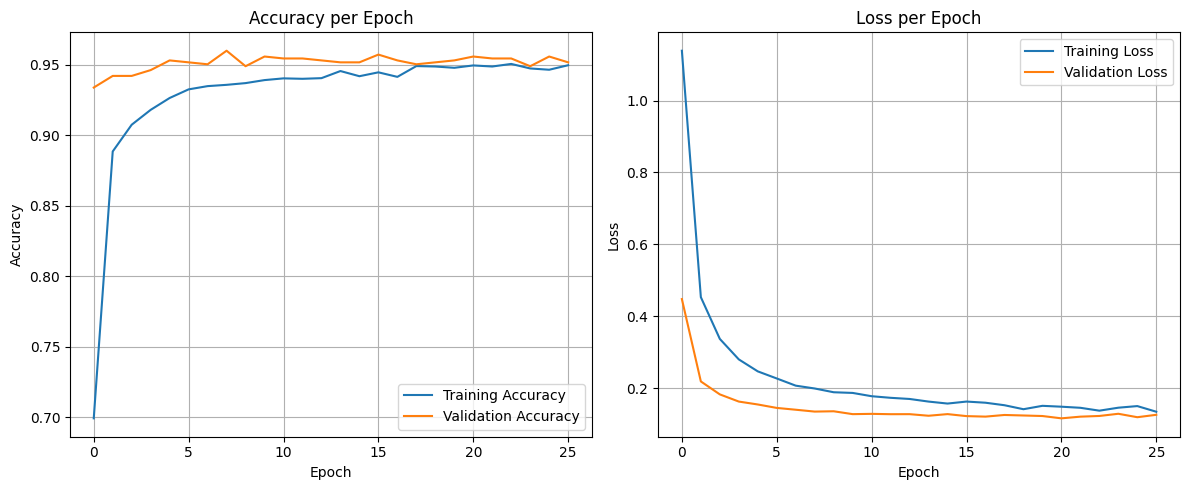

Test Loss: 0.14697368443012238
Test Accuracy: 0.9575991034507751
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


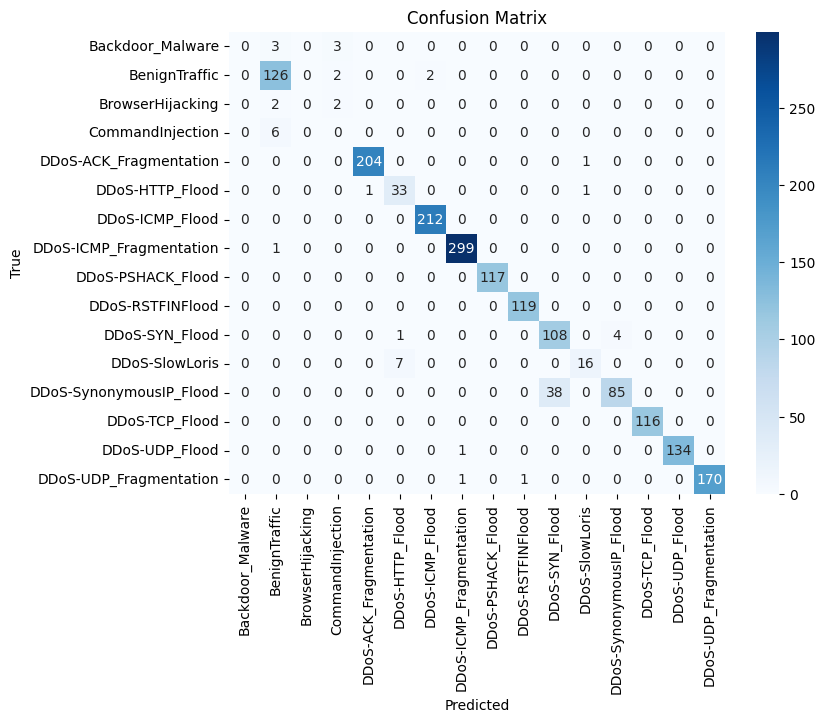

Classification Report:
                         precision    recall  f1-score   support

       Backdoor_Malware       0.00      0.00      0.00         6
          BenignTraffic       0.91      0.97      0.94       130
       BrowserHijacking       0.00      0.00      0.00         4
       CommandInjection       0.00      0.00      0.00         6
 DDoS-ACK_Fragmentation       1.00      1.00      1.00       205
        DDoS-HTTP_Flood       0.80      0.94      0.87        35
        DDoS-ICMP_Flood       0.99      1.00      1.00       212
DDoS-ICMP_Fragmentation       0.99      1.00      1.00       300
      DDoS-PSHACK_Flood       1.00      1.00      1.00       117
       DDoS-RSTFINFlood       0.99      1.00      1.00       119
         DDoS-SYN_Flood       0.74      0.96      0.83       113
         DDoS-SlowLoris       0.89      0.70      0.78        23
DDoS-SynonymousIP_Flood       0.96      0.69      0.80       123
         DDoS-TCP_Flood       1.00      1.00      1.00       116
 

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:



# Assuming 'df' is your DataFrame and 'label' is your target column
target_column = 'label'  # Replace with your target column name

# Separate features (X) and target (y)
X = df.drop(target_column, axis=1)
y = df[target_column]

# Standardize features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Encode target labels and one-hot encode
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
y = to_categorical(y)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the DNN model
model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(64, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(32, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(y_train.shape[1], activation='softmax')  # Output layer
])

# Compile the model with a learning rate scheduler
lr_schedule = keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.001, decay_steps=10000, decay_rate=0.9
)
optimizer = keras.optimizers.Adam(learning_rate=lr_schedule)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = model.fit(X_train, y_train,
                    epochs=50, batch_size=32,
                    validation_split=0.1,
                    callbacks=[early_stopping])

# Plot accuracy and loss
plt.figure(figsize=(12, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

# Confusion matrix and classification report
y_pred = np.argmax(model.predict(X_test), axis=1)
y_true = np.argmax(y_test, axis=1)

cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

print("Classification Report:")
print(classification_report(y_true, y_pred, target_names=label_encoder.classes_))


**precision, recall, and F1-score**

57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Precision: 0.9572717230034776
Recall: 0.9575991189427313
F1-score: 0.9548225749297414


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


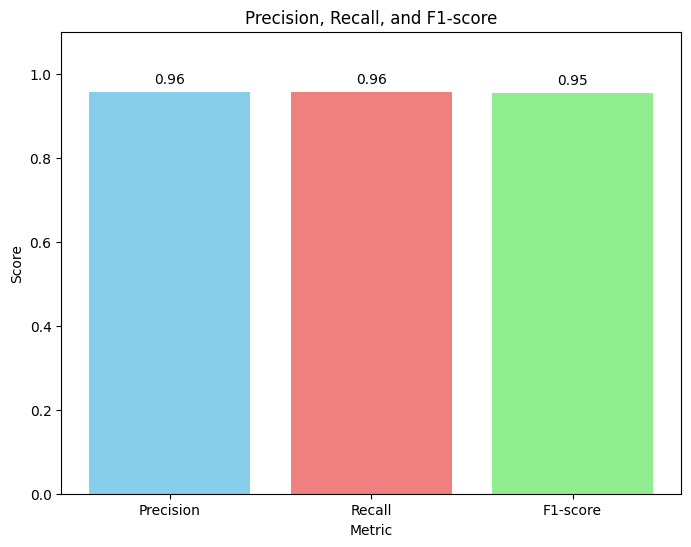

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score
# Make predictions on the test set
y_pred_prob = model.predict(X_test)
y_pred = np.argmax(y_pred_prob, axis=1)  # Convert probabilities to class labels
y_true = np.argmax(y_test, axis=1)      # Convert one-hot encoded true labels to class labels


# Calculate precision, recall, and F1-score
precision = precision_score(y_true, y_pred, average='weighted')  # Use 'weighted' for multi-class
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")

# Create the plot
metrics = ['Precision', 'Recall', 'F1-score']
scores = [precision, recall, f1]

plt.figure(figsize=(8, 6))
plt.bar(metrics, scores, color=['skyblue', 'lightcoral', 'lightgreen'])
plt.title('Precision, Recall, and F1-score')
plt.xlabel('Metric')
plt.ylabel('Score')
plt.ylim(0, 1.1)  # Set y-axis limit for better visualization
for i, v in enumerate(scores):
    plt.text(i, v + 0.02, f"{v:.2f}", ha='center', fontsize=10) #add value on top of each bar

plt.show()

**GRAPH FOR TRAINING AND VALIDATION LOSS/ACUURACY**

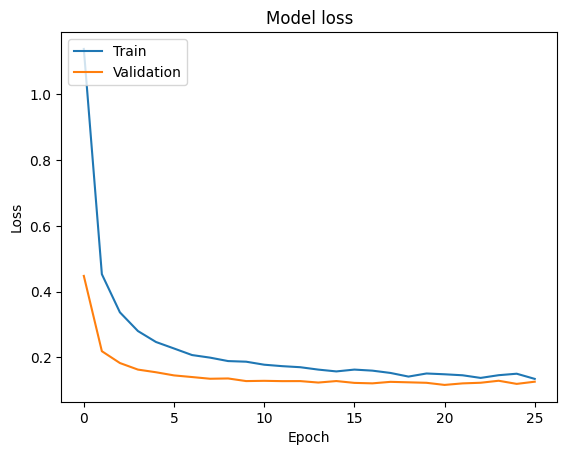

In [ ]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

**heatmap of classification report**

57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


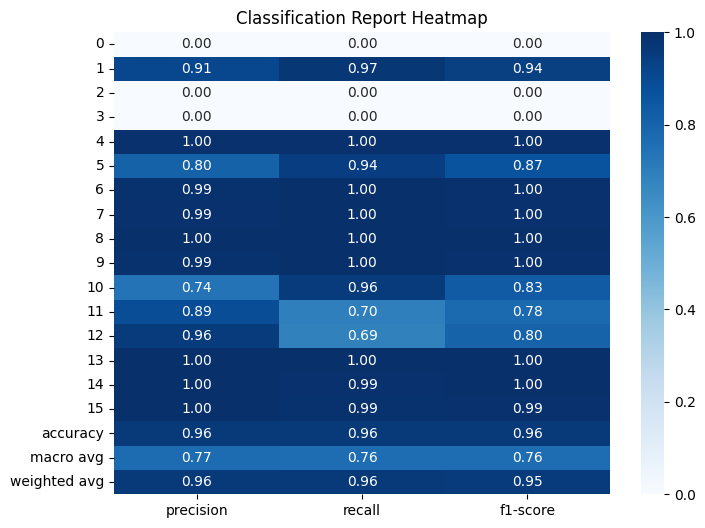

In [ ]:
import seaborn as sns
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

# ... (Your existing code) ...

# Make predictions on the test set
y_pred_prob = model.predict(X_test)
y_pred = np.argmax(y_pred_prob, axis=1)  # Convert probabilities to class labels
y_true = np.argmax(y_test, axis=1)      # Convert one-hot encoded true labels to class labels

# Get the classification report
report = classification_report(y_true, y_pred, output_dict=True)
report_df = pd.DataFrame(report).transpose()

# Remove the support column for the heatmap
report_df = report_df.drop('support', axis=1)

plt.figure(figsize=(8, 6))
sns.heatmap(report_df, annot=True, cmap='Blues', fmt=".2f")
plt.title('Classification Report Heatmap')
plt.show()